In [ ]:
# Cài đặt thư viện tự động tìm tham số (chỉ chạy 1 lần)
!pip install pmdarima
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 8.7 MB/s eta 0:00:00


# SET UP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/phân tích dữ liệu cuối kì/'

df_names = []
cryptos = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'USDC','ADA', 'SOL', 'DOGE', 'TRX']

for crypto in cryptos:
    file_path = f"{base_path}{crypto}_2024.csv"
    df_name = f"df_{crypto.lower()}"
    try:
        globals()[df_name] = pd.read_csv(file_path)
        df_names.append(df_name)
        print(f"FILE {crypto}_2024.csv được đưa vào biến {df_name}. First 5 rows:")
        print(globals()[df_name].head())
        print("\n" + "-"*30 + "\n")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Lỗi ko tìm thấy đường dẫn file")
    except Exception as e:
        print(f"lỗi exception {file_path}: {e}")

FILE BTC_2024.csv được đưa vào biến df_btc. First 5 rows:
         date symbol      open      high       low     close        volume
0  2024-01-01    BTC  42280.14  44210.89  42187.32  44197.61  8.398942e+08
1  2024-01-02    BTC  44197.61  45918.98  44181.86  44970.34  2.596745e+09
2  2024-01-03    BTC  44970.34  45513.73  40214.67  42854.08  3.533041e+09
3  2024-01-04    BTC  42854.08  44797.03  42657.44  44194.38  2.167749e+09
4  2024-01-05    BTC  44194.38  44377.15  42508.08  44178.89  2.368277e+09

------------------------------

FILE ETH_2024.csv được đưa vào biến df_eth. First 5 rows:
         date symbol     open     high      low    close        volume
0  2024-01-01    ETH  2281.36  2352.66  2265.26  2352.65  4.023440e+08
1  2024-01-02    ETH  2352.65  2432.62  2343.68  2356.28  8.222518e+08
2  2024-01-03    ETH  2356.28  2385.27  2092.33  2210.57  1.186045e+09
3  2024-01-04    ETH  2210.57  2296.81  2203.62  2269.47  7.264792e+08
4  2024-01-05    ETH  2269.47  2277.99  2208.0

In [ ]:
# Tạo một DataFrame rỗng để chứa giá đóng cửa của tất cả các coin
combined_df = pd.DataFrame()

for name in df_names:
    temp_df = globals()[name].copy()
    symbol = name.split('_')[1].upper()

    # Đảm bảo cột Date là dạng datetime và set làm index
    if 'date' in temp_df.columns:
        temp_df['date'] = pd.to_datetime(temp_df['date'])
        temp_df.set_index('date', inplace=True)

    # Chỉ lấy cột Close (hoặc Adj Close nếu bạn muốn) và đổi tên thành symbol
    # Giả sử trong file csv có cột tên là 'Close'
    combined_df[symbol] = temp_df['close']

# Hiển thị 5 dòng đầu của bảng dữ liệu gộp
print("Bảng dữ liệu giá đóng cửa (Close Price) của 10 đồng coin:")
print(combined_df.head())

Bảng dữ liệu giá đóng cửa (Close Price) của 10 đồng coin:
                 BTC      ETH     BNB     XRP   USDT    USDC     ADA     SOL  \
date                                                                           
2024-01-01  44197.61  2352.65  313.67  0.6298  1.000  1.0000  0.6234  110.02   
2024-01-02  44970.34  2356.28  312.41  0.6246  1.000  1.0000  0.6052  106.76   
2024-01-03  42854.08  2210.57  315.96  0.5826  1.000  0.9999  0.5572   98.59   
2024-01-04  44194.38  2269.47  323.99  0.5874  1.001  1.0000  0.5704  105.02   
2024-01-05  44178.89  2270.21  317.73  0.5763  1.001  1.0000  0.5419  100.01   

               DOGE     TRX  
date                         
2024-01-01  0.09200  0.1078  
2024-01-02  0.09110  0.1084  
2024-01-03  0.08203  0.1068  
2024-01-04  0.08408  0.1071  
2024-01-05  0.08272  0.1044  


In [ ]:
# Tạo một DataFrame rỗng để chứa volume
combined_df_volume = pd.DataFrame()

for name in df_names:
    temp_df = globals()[name].copy()
    symbol = name.split('_')[1].upper()

    # Đảm bảo cột Date là dạng datetime và set làm index
    if 'date' in temp_df.columns:
        temp_df['date'] = pd.to_datetime(temp_df['date'])
        temp_df.set_index('date', inplace=True)

    # lấy volume
    combined_df_volume[symbol] = temp_df['volume']

# Hiển thị 5 dòng đầu của bảng dữ liệu gộp
print("Bảng dữ liệu khối lượng giao dịch của 10 đồng coin:")
print(combined_df_volume.head())

Bảng dữ liệu khối lượng giao dịch của 10 đồng coin:
                     BTC           ETH          BNB           XRP      USDT  \
date                                                                          
2024-01-01  8.398942e+08  4.023440e+08  14746729.46  3.192121e+07  19507.29   
2024-01-02  2.596745e+09  8.222518e+08  19482343.97  6.965484e+07  57469.37   
2024-01-03  3.533041e+09  1.186045e+09  45921730.86  1.706441e+08  82076.82   
2024-01-04  2.167749e+09  7.264792e+08  25180920.77  7.990359e+07  49586.28   
2024-01-05  2.368277e+09  6.369275e+08  17990522.56  8.212043e+07  54209.93   

                USDC          ADA           SOL         DOGE         TRX  
date                                                                      
2024-01-01  19503.99  19115404.63  1.855402e+08  14363090.41   392435.17  
2024-01-02  57448.04  29680628.54  3.367984e+08  33026702.48  1121752.03  
2024-01-03  82046.18  53874007.80  4.730706e+08  59961786.12  1745409.88  
2024-01-04  49540.7

# THỐNG KÊ MÔ TẢ

In [ ]:
# Thống kê mô tả cho giá
price_stats = combined_df.describe()

print("\n--- THỐNG KÊ MÔ TẢ VỀ GIÁ (PRICE) ---")
print(price_stats)


--- THỐNG KÊ MÔ TẢ VỀ GIÁ (PRICE) ---
                 BTC          ETH         BNB         XRP        USDT  \
count     366.000000   366.000000  366.000000  366.000000  366.000000   
mean    65967.327678  3044.942213  543.223497    0.737530    1.000003   
std     14684.805742   509.615523  111.293455    0.519837    0.000675   
min     39523.630000  2210.570000  291.970000    0.419500    0.998000   
25%     59053.587500  2566.962500  518.865000    0.521325    0.999700   
50%     64150.055000  3088.225000  575.235000    0.557250    1.000000   
75%     69128.000000  3477.510000  601.085000    0.611175    1.000000   
max    106140.140000  4065.750000  750.250000    2.728000    1.002000   

             USDC         ADA         SOL        DOGE         TRX  
count  366.000000  366.000000  366.000000  366.000000  366.000000  
mean     0.999977    0.529313  155.422350    0.162930    0.147441  
std      0.000077    0.209995   37.270325    0.095396    0.046614  
min      0.999600    0.312000  

In [ ]:
# Tính lợi suất hàng ngày (Daily Returns)
returns_df = combined_df.pct_change().dropna()

# Thống kê mô tả cho lợi suất
returns_stats = returns_df.describe()

# Tính toán các chỉ số rủi ro – hiệu quả cho dữ liệu lợi nhuận
risk_metrics = pd.DataFrame({
    'Loi_nhuan_trung_binh': returns_df.mean(),          # Mean Return: Lợi nhuận trung bình theo thời gian
    'Do_bien_dong (Std)': returns_df.std(),             # Volatility (Std): Mức độ biến động, thể hiện rủi ro tổng thể
    'Do_lech (Skewness)': returns_df.skew(),            # Skewness: Độ lệch phân phối, cho biết dữ liệu lệch trái/phải
    'Do_nhon (Kurtosis)': returns_df.kurtosis()         # Kurtosis: Độ nhọn phân phối, đo mức độ xuất hiện “tail risk”
})


print("\n--- THỐNG KÊ MÔ TẢ VỀ LỢI SUẤT (RETURNS) & RỦI RO ---")
print(returns_stats)
print("\n--- CÁC CHỈ SỐ RỦI RO MỞ RỘNG ---")
print(risk_metrics)


--- THỐNG KÊ MÔ TẢ VỀ LỢI SUẤT (RETURNS) & RỦI RO ---
              BTC         ETH         BNB         XRP        USDT  \
count  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.002436    0.001523    0.002664    0.004215   -0.000005   
std      0.027909    0.034061    0.030589    0.044214    0.000518   
min     -0.084092   -0.102795   -0.090340   -0.149770   -0.001996   
25%     -0.011992   -0.016726   -0.013338   -0.014388   -0.000200   
50%      0.001240    0.001122    0.001498    0.000614    0.000000   
75%      0.015092    0.018565    0.017787    0.017732    0.000100   
max      0.119318    0.192433    0.173977    0.255600    0.001601   

               USDC         ADA         SOL        DOGE         TRX  
count  3.650000e+02  365.000000  365.000000  365.000000  365.000000  
mean   5.395030e-09    0.001789    0.002403    0.004803    0.003485  
std    1.040178e-04    0.044284    0.043095    0.054258    0.056025  
min   -9.990010e-04   -0.158996   -0.132714

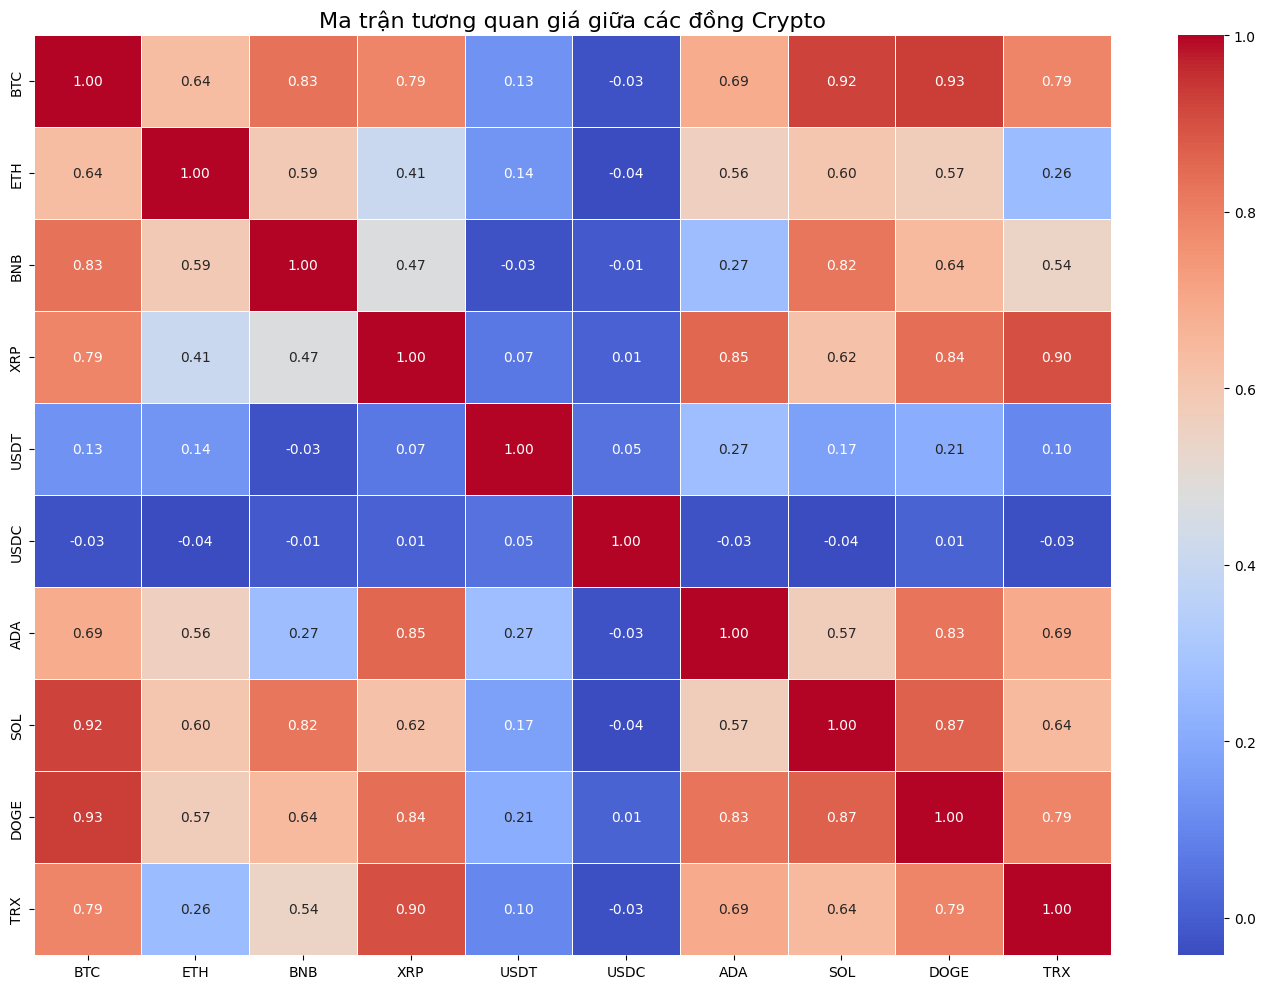

In [ ]:
plt.figure(figsize=(14, 10))

# --- MA TRẬN TƯƠNG QUAN ---
correlation_matrix = combined_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('Ma trận tương quan giá giữa các đồng Crypto', fontsize=16)
plt.tight_layout()
plt.show()


# Ứng dụng mô hình thống kê

# 1. So sánh Arima vs Sarima vs E-Garch với Bitcoin (BTC)

Phần chứng minh ở dưới để kiểm định 3 giả thuyết chính:

Giả thuyết 1: Về tính dự báo của Lợi suất (Test trên ARIMA)
*   $H_0$ (Giả thuyết không): Lợi suất Bitcoin tuân theo bước đi ngẫu nhiên (Random Walk). Dữ liệu quá khứ không có khả năng dự báo giá trị trung bình tương lai (Thị trường hiệu quả dạng yếu).
*   $H_1$ (Giả thuyết đối): Tồn tại các quy luật tuyến tính (Trend/Mùa vụ) trong lợi suất Bitcoin có thể khai thác để dự báo.


Giả thuyết 2: Về cấu trúc Rủi ro (Test trên E-GARCH)
*   $H_0$: Rủi ro (Phương sai) của Bitcoin là hằng số theo thời gian và phân phối ngẫu nhiên (Homoscedasticity).
*   $H_1$: Rủi ro thay đổi theo thời gian, có tính "nhớ" (Biến động chùm) và tồn tại các hiệu ứng phi tuyến tính.

Giả thuyết 3: Về hiệu ứng tâm lý Bất đối xứng (Test trên E-GARCH)
*   $H_0$: Thị trường phản ứng như nhau với tin tốt và tin xấu (Không có hiệu ứng đòn bẩy).
*   $H_1$: Tin xấu gây ra biến động mạnh hơn tin tốt (Có hiệu ứng đòn bẩy).





- Thực hiện kiểm định adfuller để kiểm định chuỗi dừng

In [ ]:
# Kiểm tra tính dừng cho chuỗi BTC bằng Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# Lấy dữ liệu BTC
btc_series = combined_df['BTC'].dropna()

# Thực hiện kiểm tra ADF
result = adfuller(btc_series)

# Hiển thị kết quả
print("Kết quả kiểm tra tính dừng cho BTC:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Số lượng độ trễ được sử dụng:", result[2])
print("Số lượng quan sát:", result[3])
print("Các giá trị tới hạn:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Đánh giá
if result[1] < 0.05:
    print("\n=> Chuỗi BTC có tính dừng (bác bỏ H0).")
else:
    print("\n=> Chuỗi BTC KHÔNG có tính dừng (không bác bỏ H0).")


Kết quả kiểm tra tính dừng cho BTC:
ADF Statistic: -0.9381959812932782
p-value: 0.7751339133397614
Số lượng độ trễ được sử dụng: 0
Số lượng quan sát: 365
Các giá trị tới hạn:
   1%: -3.4483935212959844
   5%: -2.8694912343676497
   10%: -2.571005879151811

=> Chuỗi BTC KHÔNG có tính dừng (không bác bỏ H0).


 - p value > 0.05 nên chuỗi chưa dừng => phải thực hiện log và mục đích so sánh với Mô hình E-Garch (bắt buộc dùng returns (đã chuẩn hóa)) nên quy đổi về log(lợi suất)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cấu hình giao diện biểu đồ cho dễ nhìn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 1. Chọn đồng coin muốn phân tích (Ví dụ: BTC)
target_coin = 'BTC'

# 2. Tính Log Returns (Lợi suất logarit)
# Công thức: r_t = ln(P_t) - ln(P_t-1)
# Lưu ý: Chuỗi log returns sẽ bị mất dòng đầu tiên (NaN) do phép shift
combined_df[f'{target_coin}_log_ret'] = np.log(combined_df[target_coin]) - np.log(combined_df[target_coin].shift(1))

# Loại bỏ các dòng NaN (dòng đầu tiên) để không bị lỗi khi chạy kiểm định
df_clean = combined_df.dropna().copy()

print(f"Đã tạo xong chuỗi Log Returns cho {target_coin}.")
print(df_clean[[target_coin, f'{target_coin}_log_ret']].head())

Đã tạo xong chuỗi Log Returns cho BTC.
                 BTC  BTC_log_ret
date                             
2024-01-02  44970.34     0.017332
2024-01-03  42854.08    -0.048202
2024-01-04  44194.38     0.030797
2024-01-05  44178.89    -0.000351
2024-01-06  43988.33    -0.004323


In [ ]:
def check_stationarity_and_plot(series, title, is_diff=False):
    print(f"--- Kiểm định Augmented Dickey-Fuller cho: {title} ---")
    result = adfuller(series)
    p_value = result[1]

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.10f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    # Kết luận
    if p_value < 0.05:
        print(f"KẾT LUẬN: Chuỗi có p-value < 0.05 => Bác bỏ H0 => CHUỖI DỪNG (Stationary).\n")
    else:
        print(f"KẾT LUẬN: Chuỗi có p-value > 0.05 => Chấp nhận H0 => CHUỖI KHÔNG DỪNG (Non-Stationary).\n")

    # Vẽ biểu đồ
    plt.figure(figsize=(15, 5))
    plt.plot(series, color='blue' if not is_diff else 'green', label=title)
    plt.title(f'Biểu đồ biến động: {title} (p-value={p_value:.4f})', fontsize=14)
    plt.legend(loc='best')
    plt.show()

# --- THỰC HIỆN KIỂM TRA ---

# 1. Kiểm tra chuỗi Giá gốc (Thường là KHÔNG DỪNG)
check_stationarity_and_plot(df_clean[target_coin], f'Giá đóng cửa gốc của {target_coin}', is_diff=False)

# 2. Kiểm tra chuỗi Log Returns (Thường là ĐÃ DỪNG)
check_stationarity_and_plot(df_clean[f'{target_coin}_log_ret'], f'Lợi suất Logarit (Log Returns) của {target_coin}', is_diff=True)

**ARIMA**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- BƯỚC 1: CHIA TRAIN / TEST ---
# Giả sử df_clean là bảng dữ liệu đã xử lý NaN, 'BTC_log_ret' là cột đã làm dừng
data = df_clean['BTC_log_ret']

# Chia 90% Train, 10% Test (Vì dữ liệu 1 năm khá ngắn)
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

print(f"Kích thước tập Train: {len(train_data)}")
print(f"Kích thước tập Test: {len(test_data)}")

# --- BƯỚC 2: QUAN SÁT ACF & PACF ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Vẽ ACF để tìm q
plot_acf(train_data, lags=30, ax=ax1, title='ACF (Tìm q - Moving Average)')

# Vẽ PACF để tìm p
plot_pacf(train_data, lags=30, ax=ax2, title='PACF (Tìm p - Auto Regressive)')

plt.tight_layout()
plt.show()

# --- BƯỚC 3: TỰ ĐỘNG TÌM THAM SỐ TỐI ƯU (AUTO ARIMA) ---
print("\nĐang chạy Auto ARIMA để tìm bộ tham số tốt nhất (p,d,q)...")

# stepwise_fit sẽ thử các tổ hợp và chọn AIC thấp nhất
# seasonal=False trước để thử ARIMA thường. Nếu muốn SARIMA thì chỉnh seasonal=True và m=7 (chu kỳ tuần)
model_auto = auto_arima(train_data,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        d=0,             # Vì chuỗi đã dừng (Log Return) nên d=0
                        seasonal=False,  # Thử ARIMA trước (không mùa vụ)
                        trace=True,      # Hiện quá trình chạy
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print("\n--- KẾT QUẢ TỐT NHẤT TỪ AUTO ARIMA ---")
print(model_auto.summary())

# Lưu ý: Kết quả ở dòng "Model" ví dụ SARIMAX(1, 0, 0) chính là p=1, d=0, q=0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dự báo n bước tiếp theo (bằng độ dài tập test)
n_periods = len(test_data)
fitted, conf_int = model_auto.predict(n_periods=n_periods, return_conf_int=True)

# Tạo Pandas Series để dễ vẽ biểu đồ (gán index ngày tháng từ test_data)
forecast_series = pd.Series(fitted, index=test_data.index)
lower_series = pd.Series(conf_int[:, 0], index=test_data.index)
upper_series = pd.Series(conf_int[:, 1], index=test_data.index)

In [ ]:
# MSE, RMSE, MAE
mse = mean_squared_error(test_data, fitted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, fitted)

# Directional Accuracy (Độ chính xác về xu hướng Tăng/Giảm)
# np.sign trả về 1 nếu dương, -1 nếu âm. So sánh dấu của thực tế và dự báo.
actual_direction = np.sign(test_data)
pred_direction = np.sign(fitted)
correct_direction = (actual_direction == pred_direction).sum()
dir_accuracy = correct_direction / len(test_data) * 100

print("\n" + "="*40)
print(" KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ARIMA(0,0,0)")
print("="*40)
print(f"1. RMSE (Sai số chuẩn):       {rmse:.6f}")
print(f"2. MAE (Sai số tuyệt đối):    {mae:.6f}")
print(f"3. Directional Accuracy:      {dir_accuracy:.2f}% (Tỷ lệ đoán đúng chiều Tăng/Giảm)")
print("-" * 40)
print("Nhận xét: Với ARIMA(0,0,0), đường dự báo là một hằng số.")
print("Mô hình chỉ dự báo giá trị trung bình dài hạn, không bắt được biến động.")

In [ ]:
plt.figure(figsize=(15, 8))

# Vẽ dữ liệu Train (chỉ lấy 2 tháng cuối để biểu đồ không bị rối)
plt.plot(train_data.index[-60:], train_data[-60:], label='Training Data (Last 60 days)', color='grey', alpha=0.5)

# Vẽ dữ liệu Test (Thực tế)
plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue', linewidth=1.5)

# Vẽ dữ liệu Dự báo (Forecast)
plt.plot(forecast_series.index, forecast_series, label='ARIMA Forecast', color='red', linestyle='--', linewidth=2)

# Vẽ khoảng tin cậy 95% (Vùng màu hồng)
plt.fill_between(lower_series.index, lower_series, upper_series, color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Kết quả dự báo Lợi suất Bitcoin với ARIMA(0,0,0)', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Log Returns')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# --- BƯỚC 4: KIỂM TRA PHẦN DƯ (QUAN TRỌNG CHO GARCH) ---
# Lấy phần dư (residuals) từ mô hình
residuals = model_auto.resid()

plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Biểu đồ Phần dư (Residuals) của mô hình ARIMA', fontsize=14)
plt.ylabel('Sai số')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

# In thống kê mô tả của phần dư
print("\nThống kê mô tả của phần dư (Residuals):")
print(pd.Series(residuals).describe())

- Về mặt trực quan: Đường dự báo (Forecast line - màu đỏ) là một đường thẳng nằm ngang (hằng số), thể hiện giá trị trung bình dài hạn của chuỗi dữ liệu (~0.24%). Khoảng tin cậy 95% (vùng màu hồng) là một dải băng có độ rộng không đổi theo thời gian. Điều này cho thấy mô hình ARIMA giả định rằng rủi ro (phương sai) của Bitcoin là hằng số (Homoscedasticity) – một giả định sai lầm nghiêm trọng so với thực tế biến động mạnh của đường giá thực tế (màu xanh).
- Về mặt định lượng: Các chỉ số kiểm định cho thấy hiệu quả dự báo rất thấp. Cụ thể, Directional Accuracy đạt 48.65%, thấp hơn mức ngẫu nhiên (50%). ***Điều này hàm ý rằng việc sử dụng dữ liệu quá khứ để dự báo chiều hướng tăng/giảm của Bitcoin bằng mô hình tuyến tính không hiệu quả hơn việc tung đồng xu***. Kết quả này phù hợp với Giả thuyết thị trường hiệu quả (EMH) dạng yếu, cho rằng giá cả hiện tại đã phản ánh đầy đủ thông tin quá khứ.

SARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. CHUẨN BỊ DỮ LIỆU ---
# Giả sử combined_df đã có từ các bước trước
# Tính Log Returns cho Bitcoin
combined_df['BTC_log_ret'] = np.log(combined_df['BTC']) - np.log(combined_df['BTC'].shift(1))
data = combined_df['BTC_log_ret'].dropna()

# Chia tập Train (90%) và Test (10%)
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

print(f"Kích thước tập Train: {len(train_data)} ngày")
print(f"Kích thước tập Test: {len(test_data)} ngày")
print("Dữ liệu đã sẵn sàng!")

In [ ]:
# Phân rã chuỗi thời gian để xem Trend và Seasonality
# period=7 tương ứng với chu kỳ tuần
decomposition = seasonal_decompose(train_data, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Phân rã chuỗi Lợi suất Bitcoin (Chu kỳ tuần)', fontsize=16)
plt.tight_layout()
plt.show()

# Nhận xét nhanh:
# Bạn hãy nhìn vào biểu đồ thứ 3 (Seasonal).
# Nếu biên độ dao động của nó quá nhỏ (ví dụ 1e-5) so với biểu đồ gốc, nghĩa là tính mùa vụ rất yếu.

In [ ]:
print("Đang chạy Auto-SARIMA để tìm tham số (p,d,q) x (P,D,Q,m)...")
print("Quá trình này có thể mất vài phút...")

# Cấu hình Auto ARIMA có mùa vụ
model_sarima = auto_arima(train_data,
                          start_p=0, start_q=0,
                          max_p=3, max_q=3,
                          d=0,               # Log return đã dừng nên d=0
                          seasonal=True,     # BẬT CHẾ ĐỘ MÙA VỤ
                          m=7,               # Chu kỳ tuần (Weekly seasonality)
                          start_P=0, start_Q=0,
                          max_P=2, max_Q=2,
                          D=None,            # Để máy tự tìm D (Seasonal differencing)
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print("\n--- KẾT QUẢ TỐT NHẤT (BEST SARIMA MODEL) ---")
print(model_sarima.summary())

# Lưu ý: Hãy nhìn dòng "Model".
# Nếu nó ra dạng SARIMAX(p,d,q)x(P,D,Q,7) nghĩa là CÓ tính mùa vụ.
# Nếu phần (P,D,Q) toàn là số 0, nghĩa là KHÔNG tìm thấy mùa vụ đáng kể.

In [ ]:
# --- 1. DỰ BÁO ---
prediction, conf_int = model_sarima.predict(n_periods=len(test_data), return_conf_int=True)

# Chuyển về Series
pred_series = pd.Series(prediction, index=test_data.index)
lower_series = pd.Series(conf_int[:, 0], index=test_data.index)
upper_series = pd.Series(conf_int[:, 1], index=test_data.index)

# --- 2. ĐÁNH GIÁ HIỆU SUẤT ---
# MSE, RMSE, MAE
mse = mean_squared_error(test_data, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, prediction)

# Directional Accuracy (Độ chính xác về xu hướng)
actual_dir = np.sign(test_data)
pred_dir = np.sign(prediction)
dir_accuracy = (actual_dir == pred_dir).sum() / len(test_data) * 100

print("\n" + "="*40)
print(" KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH SARIMA")
print("="*40)
print(f"1. RMSE:                {rmse:.6f}")
print(f"2. MAE:                 {mae:.6f}")
print(f"3. Directional Accuracy: {dir_accuracy:.2f}%")
print("-" * 40)

In [ ]:
# --- 1. BIỂU ĐỒ DỰ BÁO ---
plt.figure(figsize=(15, 10))

# Subplot 1: Dự báo giá
plt.subplot(2, 1, 1)
plt.plot(train_data.index[-60:], train_data[-60:], label='Train (2 tháng cuối)', color='grey', alpha=0.5)
plt.plot(test_data.index, test_data, label='Test (Thực tế)', color='blue')
plt.plot(pred_series.index, pred_series, label='SARIMA Forecast', color='green', linestyle='--')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgreen', alpha=0.3)
plt.title('Dự báo SARIMA (có xét yếu tố mùa vụ tuần)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Phần dư (Residuals)
residuals = model_sarima.resid()
plt.subplot(2, 1, 2)
plt.plot(residuals, color='purple', alpha=0.7)
plt.title('Biểu đồ Phần dư (Residuals) của SARIMA', fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Kiểm tra nhanh phân phối phần dư
print("\nThống kê phần dư:")
print(pd.Series(residuals).describe())

=> kết quả giống với arima, lý do:
- Thực tế dữ liệu: Như chúng ta đã thấy ở biểu đồ phân rã (Decomposition), yếu tố mùa vụ tuy có tồn tại nhưng biên độ quá nhỏ (chỉ khoảng 0.5%) so với độ nhiễu của thị trường (10%). Trong khung thời gian 1 năm này, yếu tố mùa vụ (chu kỳ tuần) của Bitcoin là không có ý nghĩa thống kê. Việc sử dụng các mô hình phức tạp như SARIMA là không cần thiết (redundant).

=> loại bỏ mô hình sarima, chỉ thực hiện so sánh bằng mô hình arima với e-garch

E-GARCH

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Chúng ta dùng chuỗi Log Returns của Bitcoin
# QUAN TRỌNG: Nhân với 100 để chuyển về đơn vị % (giúp mô hình hội tụ tốt hơn)
btc_returns = df_clean['BTC_log_ret'] * 100

# Chia tập Train/Test (90% - 10%)
train_size = int(len(btc_returns) * 0.9)
train_data = btc_returns[:train_size]
test_data = btc_returns[train_size:]

print("Đã chuẩn bị xong dữ liệu (Đơn vị: %)")
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

In [ ]:
# --- THIẾT LẬP MÔ HÌNH ---
# mean='Constant': Giữ lại phần chặn (intercept) giống ARIMA(0,0,0)
# vol='EGARCH': Chọn mô hình E-GARCH
# p=1, q=1: Bậc của GARCH
# dist='skewt': Sử dụng phân phối Skewed Student's t (Xử lý đuôi dày và lệch)

garch_model = arch_model(train_data, vol='EGARCH', p=1, q=1, o=1, mean='Constant', dist='skewt')

# train
res_egarch = garch_model.fit(disp='off') # disp='off' để ẩn log chạy

print("\n--- KẾT QUẢ MÔ HÌNH E-GARCH(1,1) ---")
print(res_egarch.summary())

Giải thích ngắn gọn

------------------------------------------------

Hệ số $\beta$ (beta) = 0.8563 với độ tin cậy thống kê cực cao ($p \approx 0$).

=> Rủi ro của Bitcoin có "trí nhớ" dài hạn. Nếu hôm nay thị trường biến động mạnh, sự bất ổn đó sẽ không biến mất ngay mà sẽ lan truyền (decay) rất chậm sang nhiều ngày sau.

------------------------------------------------

Hệ số ARCH - alpha[1] (Tác động của độ lớn tin tức)


*   Giá trị: $0.1624$
- P-value: $0.035$ (Nhỏ hơn 0.05, có ý nghĩa thống kê)
*   Độ lớn của phần dư (tin tức/shock) ngày hôm qua có tác động đáng kể đến độ biến động hôm nay. Thị trường rất nhạy cảm với các thông tin mới xuất hiện.



------------------------------------------------

Hệ số Leverage/Asymmetry - gamma[1] (Hiệu ứng đòn bẩy)

- Giá trị: $-0.0962$

- P-value: $0.238$ (Lớn hơn 0.05, KHÔNG có ý nghĩa thống kê)

Phân tích đặc biệt:Trong mô hình E-GARCH, nếu $\gamma < 0$ và có ý nghĩa thống kê, tức là "tin xấu" (giá giảm) gây ra biến động mạnh hơn "tin tốt" (giá tăng). Tuy nhiên, ở đây P-value > 0.05. Điều này chỉ ra rằng: Không có bằng chứng thống kê về hiệu ứng đòn bẩy trong tập dữ liệu này.

=> Kết luận: Với Bitcoin trong năm 2024, thị trường phản ứng "mạnh" như nhau với cả tin tốt (Pump) và tin xấu (Dump). Cả hai chiều tăng và giảm đều tạo ra rủi ro biến động ngang nhau.

------------------------------------------------

In [ ]:
# Lấy độ biến động có điều kiện (Conditional Volatility) từ mô hình
conditional_volatility = res_egarch.conditional_volatility

plt.figure(figsize=(15, 6))

# Vẽ Lợi suất thực tế (Màu xám nhạt để làm nền)
plt.plot(train_data.index, train_data, color='grey', alpha=0.4, label='Lợi suất thực tế (Returns)')

# Vẽ Độ biến động dự báo (Màu đỏ) -> Đây là "Rủi ro"
# Vì volatility là độ lệch chuẩn, ta vẽ +/- volatility để tạo thành "đường ống rủi ro"
plt.plot(train_data.index, conditional_volatility, color='red', label='Độ biến động (Risk/Volatility)')
plt.plot(train_data.index, -conditional_volatility, color='red')

plt.title('Mô hình E-GARCH: Lợi suất Bitcoin và Độ biến động rủi ro', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# method='simulation': Chạy mô phỏng Monte Carlo
# simulations=1000: Số lần chạy giả lập để lấy trung bình (càng cao càng chính xác nhưng chậm)
forecasts = res_egarch.forecast(horizon=len(test_data),
                                reindex=False,
                                method='simulation',
                                simulations=1000)

# Lấy giá trị dự báo variance
# Hàm forecast trả về variance của từng bước trong tương lai tính từ điểm cuối của train data
# variance có shape (1, horizon)
forecast_variance = forecasts.variance.values[-1, :]

# Căn bậc hai để ra volatility (độ lệch chuẩn)
forecast_vol = np.sqrt(forecast_variance)

# Tạo Series để vẽ biểu đồ (gán index của tập Test vào)
forecast_series = pd.Series(forecast_vol, index=test_data.index)

# --- VẼ BIỂU ĐỒ SO SÁNH TRÊN TẬP TEST ---
plt.figure(figsize=(15, 8))

# 1. Vẽ Lợi suất thực tế của tập Test (Màu xanh dương)
plt.plot(test_data.index, test_data, label='Lợi suất thực tế (Test Data)', color='blue', alpha=0.6)

# 2. Vẽ Đường biên rủi ro dự báo (Predicted VaR)
# Thường lấy +/- 1.96 * sigma cho độ tin cậy 95% (nếu giả định chuẩn)
# Hoặc +/- 2.58 * sigma cho độ tin cậy 99%
plt.plot(test_data.index, 1.96 * forecast_series, color='red', linestyle='--', linewidth=2, label='Dự báo biên độ rủi ro (95% Confidence)')
plt.plot(test_data.index, -1.96 * forecast_series, color='red', linestyle='--', linewidth=2)

# Tô màu vùng rủi ro dự báo
plt.fill_between(test_data.index, -1.96 * forecast_series, 1.96 * forecast_series, color='pink', alpha=0.2)

plt.title('Dự báo Rủi ro Bitcoin trên tập Test (E-GARCH Simulation)', fontsize=16)
plt.ylabel('Lợi suất (%)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# In ra giá trị rủi ro trung bình dự báo
print(f"Độ biến động trung bình dự báo (Volatility): {forecast_series.mean():.4f}% mỗi ngày")

**Kết luận**



1.   Về Lợi suất (Returns): Bitcoin trong giai đoạn nghiên cứu thể hiện tính chất của một Bước đi ngẫu nhiên (Random Walk). Các mô hình tuyến tính như ARIMA hoàn toàn bất lực trong việc dự báo hướng đi (Tăng/Giảm) của ngày hôm sau. Điều này ủng hộ Giả thuyết Thị trường Hiệu quả (EMH) ở dạng yếu.
2.   Về Rủi ro (Volatility): Trái ngược với giá, rủi ro của Bitcoin có cấu trúc rất rõ ràng. Nó thể hiện tính Biến động chùm (Volatility Clustering) mạnh mẽ và dai dẳng (Hệ số persistence $\approx 0.86$). Điều này nghĩa là các giai đoạn "bão tố" và "bình yên" không xảy ra ngẫu nhiên mà có tính dây chuyền.
3. Về Tâm lý thị trường: Một phát hiện thú vị từ E-GARCH là không tìm thấy hiệu ứng bất đối xứng (Leverage Effect). Trong năm 2024, thị trường Crypto phản ứng "nhạy cảm" (dễ tổn thương/biến động) với cả tin tốt (FOMO) lẫn tin xấu (FUD) ở mức độ tương đương nhau. (nhận xét về chỉ số garma)



Nhận định:
- Không nên: Cố gắng dùng các mô hình hồi quy giá quá khứ để trade lướt sóng ngắn hạn (vì Accuracy < 50%).
- Nên: Sử dụng mô hình E-GARCH để dự báo biên độ dao động (VaR). Ví dụ: E-GARCH dự báo ngày mai biến động $\pm 5\%$, nhà đầu tư nên đặt Stoploss rộng hơn khoảng này để tránh bị quét lệnh (hunt stoploss) trong các pha biến động nhiễu.

# 2. Kiểm định tính lan truyền của Bitcoin tới các altcoin trong danh mục

Giả thuyết 1: Sự đồng nhất của thị trường trong dài hạn (Market Integration)
-  Tồn tại ít nhất một mối quan hệ cân bằng dài hạn (đồng tích hợp) giữa giá Bitcoin và giá của nhóm Altcoins. Dù trong ngắn hạn giá có thể biến động hỗn loạn, nhưng về lâu dài, chúng bị ràng buộc với nhau và di chuyển theo cùng một xu hướng chung.
- Kiểm định bằng: Johansen Cointegration Test.Kỳ vọng: Bác bỏ $H_0$ (tức là $r > 0$, có vector đồng tích hợp).

Giả thuyết 2: Cơ chế tự điều chỉnh khi mất cân bằng (Market Adjustment)
- Nội dung: Khi xuất hiện sự chênh lệch giá (sai số) phá vỡ thế cân bằng dài hạn, nhóm Altcoins sẽ là bên phải biến động để "sửa sai" và quay về mức cân bằng với Bitcoin. Ngược lại, Bitcoin là biến ngoại sinh, không bị áp lực phải điều chỉnh theo giá Altcoins.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

stable_coins = ['USDT', 'USDC']

# Lọc lấy các cột KHÔNG nằm trong danh sách stable_coins
analysis_cols = [col for col in combined_df.columns if col not in stable_coins]
df_prices = combined_df[analysis_cols].copy()

# Xử lý dữ liệu thiếu (nếu có) bằng cách fill forward hoặc drop
df_prices.dropna(inplace=True)

print(f"Đã loại bỏ: {stable_coins}")
print(f"Các coin còn lại để phân tích ({len(analysis_cols)} coin): {analysis_cols}")

Đã loại bỏ: ['USDT', 'USDC']
Các coin còn lại để phân tích (9 coin): ['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'SOL', 'DOGE', 'TRX', 'BTC_log_ret']


In [ ]:
df_returns = np.log(df_prices / df_prices.shift(1)).dropna()

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [ ]:
def adf_test(series, title=''):
    print(f'Kết quả ADF Test cho: {title}')
    result = adfuller(series, autolag='AIC')

    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val

    print(out)

    if result[1] <= 0.05:
        print("=> Kết luận: Chuỗi có tính DỪNG (Bác bỏ H0)")
        print("-" * 40)
        return True # Stationary
    else:
        print("=> Kết luận: Chuỗi KHÔNG DỪNG (Chấp nhận H0)")
        print("-" * 40)
        return False # Non-Stationary

print("\n" + "="*50)
print("PHẦN 1: KIỂM ĐỊNH TRÊN GIÁ GỐC (PRICES)")
print("Kỳ vọng: Kết quả là KHÔNG DỪNG (p-value > 0.05) -> Để chạy Johansen/VECM")
print("="*50 + "\n")

non_stationary_count = 0
for col in df_prices.columns:
    is_stationary = adf_test(df_prices[col], title=f"{col} - PRICE")
    if not is_stationary:
        non_stationary_count += 1

print(f"Tổng kết Giá gốc: {non_stationary_count}/{len(df_prices.columns)} coin KHÔNG dừng.")


print("\n" + "="*50)
print("PHẦN 2: KIỂM ĐỊNH TRÊN LỢI SUẤT (LOG RETURNS)")
print("Kỳ vọng: Kết quả là DỪNG (p-value < 0.05) -> Để chạy VAR/Granger")
print("="*50 + "\n")

stationary_count = 0
for col in df_returns.columns:
    is_stationary = adf_test(df_returns[col], title=f"{col} - LOG RETURN")
    if is_stationary:
        stationary_count += 1

print(f"Tổng kết Lợi suất: {stationary_count}/{len(df_returns.columns)} coin có tính DỪNG.")


PHẦN 1: KIỂM ĐỊNH TRÊN GIÁ GỐC (PRICES)
Kỳ vọng: Kết quả là KHÔNG DỪNG (p-value > 0.05) -> Để chạy Johansen/VECM

Kết quả ADF Test cho: BTC - PRICE
ADF Statistic            -0.912982
p-value                   0.783667
# Lags Used               0.000000
# Observations          364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64
=> Kết luận: Chuỗi KHÔNG DỪNG (Chấp nhận H0)
----------------------------------------
Kết quả ADF Test cho: ETH - PRICE
ADF Statistic            -2.152900
p-value                   0.223782
# Lags Used               0.000000
# Observations          364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64
=> Kết luận: Chuỗi KHÔNG DỪNG (Chấp nhận H0)
----------------------------------------
Kết quả ADF Test cho: BNB - PRICE
ADF Statistic            -1.874464
p-value                   0.344168
# Lags Used          

**KIỂM ĐỊNH GIẢ THUYẾT 1:**

Mô hình JOHANSEN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR

# 1. Lọc dữ liệu phù hợp (Chỉ lấy các coin Non-stationary I(1))
# Lưu ý: Dùng lại biến df_prices (Giá gốc) từ các bước trước
selected_coins = ['BTC', 'ETH', 'BNB', 'SOL', 'DOGE', 'TRX']
df_johansen = df_prices[selected_coins].dropna()

print(f"Dữ liệu đầu vào cho Johansen: {df_johansen.shape}")

# 2. Chọn độ trễ tối ưu (Lag Order Selection)
# Johansen rất nhạy cảm với độ trễ. Ta dùng VAR để gợi ý.
model_var = VAR(df_johansen)
# Chọn maxlags tùy ý (ví dụ 10 ngày), dùng tiêu chuẩn AIC
lag_results = model_var.select_order(maxlags=10)
optimal_lag = lag_results.aic

print("-" * 50)
print(f"Độ trễ tối ưu theo tiêu chuẩn AIC của mô hình VAR là: {optimal_lag}")
print(f"-> Độ trễ sẽ dùng cho Johansen (k_ar_diff) = {optimal_lag} - 1 = {optimal_lag - 1}")
print("-" * 50)

Dữ liệu đầu vào cho Johansen: (365, 6)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--------------------------------------------------
Độ trễ tối ưu theo tiêu chuẩn AIC của mô hình VAR là: 10
-> Độ trễ sẽ dùng cho Johansen (k_ar_diff) = 10 - 1 = 9
--------------------------------------------------


In [ ]:
def johansen_test(df, k_ar_diff):
    # det_order=0: Có hằng số trong phương trình (Constant assumption)
    result = coint_johansen(df, det_order=0, k_ar_diff=k_ar_diff)

    traces = result.lr1
    crit_vals_90 = result.cvt[:, 0]
    crit_vals_95 = result.cvt[:, 1] # Chúng ta quan tâm cột này
    crit_vals_99 = result.cvt[:, 2]

    print(f"\nKẾT QUẢ KIỂM ĐỊNH JOHANSEN (Trace Statistic)")
    # SỬA LỖI Ở ĐÂY: Dùng len(df) thay vì result.nobs
    print(f"Số lượng quan sát đầu vào: {len(df)}")
    print("=" * 85)
    print(f"{'Hypothesis (r)':<15} | {'Trace Stat':<15} | {'Critical (95%)':<15} | {'Diff (Stat-Crit)':<15} | {'Kết luận':<10}")
    print("-" * 85)

    r_count = 0
    eigenvalues = result.eig

    for i in range(len(traces)):
        trace_stat = traces[i]
        crit_val = crit_vals_95[i]
        diff = trace_stat - crit_val

        # Nếu Trace > Critical => Bác bỏ H0 => Có mối quan hệ
        if trace_stat > crit_val:
            conclusion = "Có (Sig*)"
            r_count = i + 1
        else:
            conclusion = "Không"

        print(f"r <= {i:<10} | {trace_stat:<15.4f} | {crit_val:<15.4f} | {diff:<15.4f} | {conclusion}")

    print("=" * 85)

    if r_count > 0:
        print(f"==> TỔNG KẾT: Tìm thấy {r_count} mối quan hệ đồng tích hợp (Cointegrating Vectors).")
        print("==> Ý nghĩa: Các coin này di chuyển cùng nhau trong dài hạn.")
    else:
        print("==> TỔNG KẾT: Không tìm thấy mối quan hệ đồng tích hợp nào.")

    return result, r_count

# Chạy hàm với độ trễ đã tính ở Cell 1
# Lưu ý: Nếu Cell 1 ra lag=1 thì k_ar_diff=0. Nếu lag=2 thì k_ar_diff=1.
# Ở đây tôi để mặc định là optimal_lag - 1, nhưng tối thiểu phải là 0
johansen_lag = max(0, optimal_lag - 1)
result_obj, r_vectors = johansen_test(df_johansen, k_ar_diff=johansen_lag)


KẾT QUẢ KIỂM ĐỊNH JOHANSEN (Trace Statistic)
Số lượng quan sát đầu vào: 365
Hypothesis (r)  | Trace Stat      | Critical (95%)  | Diff (Stat-Crit) | Kết luận  
-------------------------------------------------------------------------------------
r <= 0          | 106.6466        | 95.7542         | 10.8924         | Có (Sig*)
r <= 1          | 48.9848         | 69.8189         | -20.8341        | Không
r <= 2          | 25.7892         | 47.8545         | -22.0653        | Không
r <= 3          | 12.3281         | 29.7961         | -17.4680        | Không
r <= 4          | 4.9413          | 15.4943         | -10.5530        | Không
r <= 5          | 0.1083          | 3.8415          | -3.7332         | Không
==> TỔNG KẾT: Tìm thấy 1 mối quan hệ đồng tích hợp (Cointegrating Vectors).
==> Ý nghĩa: Các coin này di chuyển cùng nhau trong dài hạn.


- Tại dòng r <= 0:Giá trị thống kê Trace Statistic (106.65) lớn hơn Critical Value 95% (95.75).Khoảng chênh lệch (Diff) là dương (+10.89).Ý nghĩa: Chúng ta bác bỏ giả thuyết $H_0$ (r=0). Tức là chắc chắn có mối quan hệ đồng tích hợp.
- Tại dòng r <= 1:Giá trị thống kê Trace Statistic (48.98) nhỏ hơn Critical Value 95% (69.82).Ý nghĩa: Chúng ta chấp nhận dừng lại ở đây. **Không có thêm mối quan hệ thứ 2**.

=> Kết luận thống kê:Hệ thống 6 đồng coin này tồn tại đúng 1 vector đồng tích hợp (r = 1).

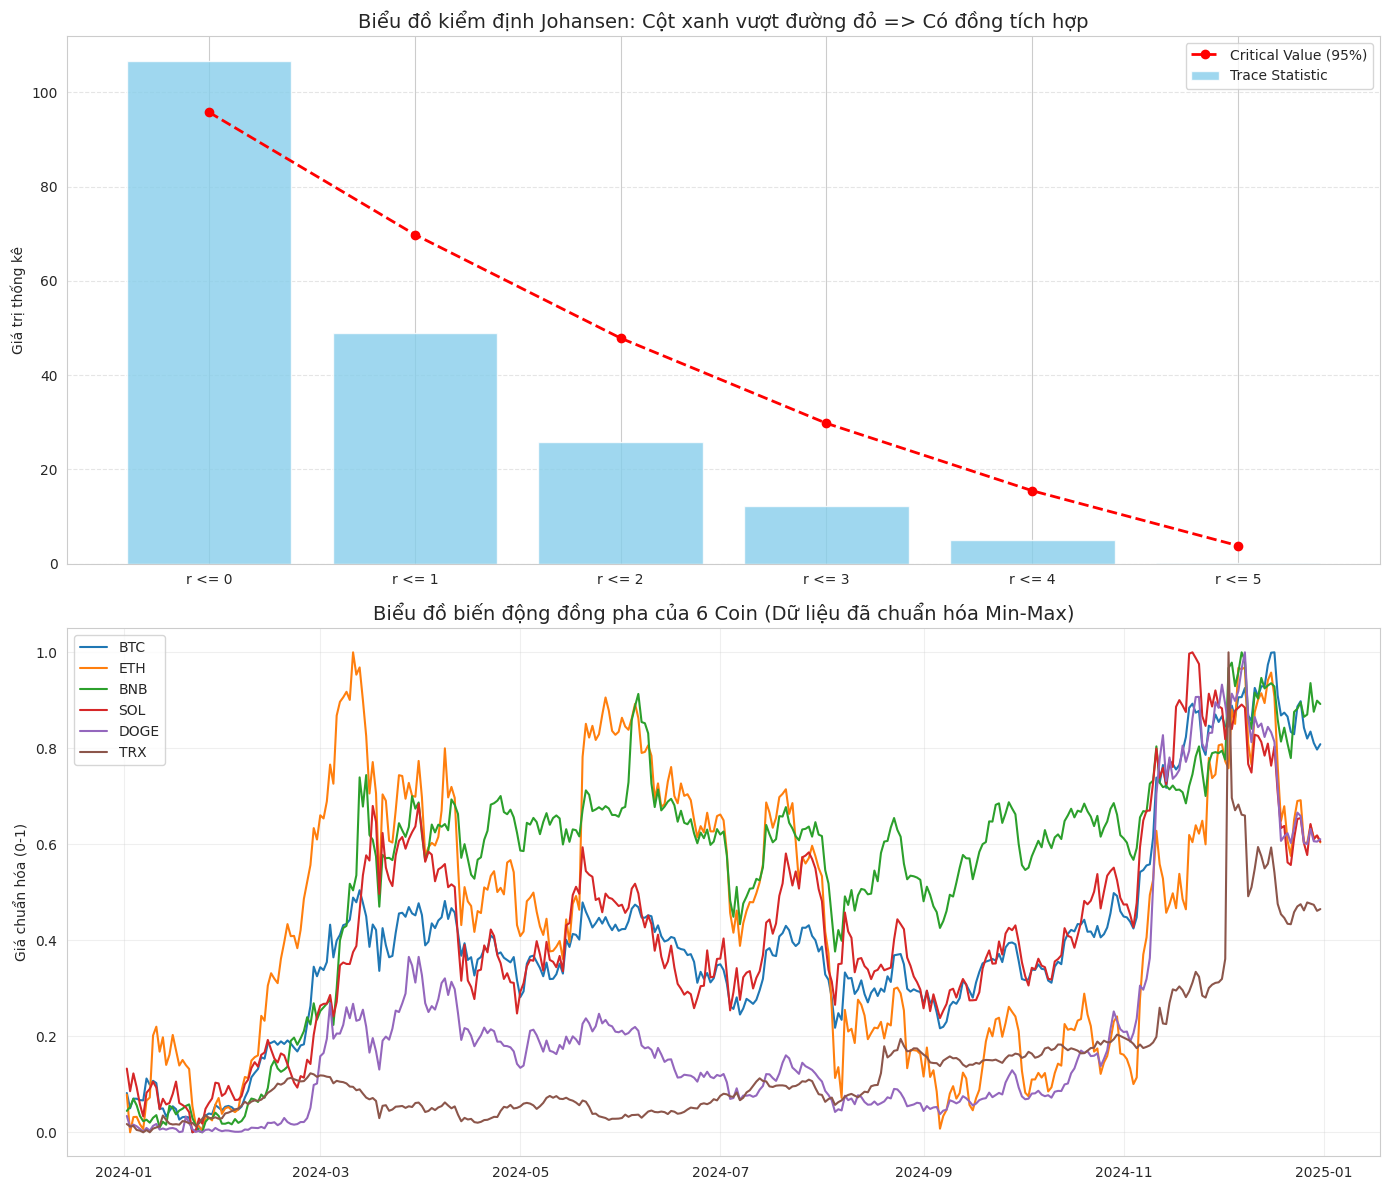

In [ ]:
# Setup kích thước ảnh
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# --- BIỂU ĐỒ 1: KẾT QUẢ KIỂM ĐỊNH (Trace Statistic vs Critical Value) ---
traces = result_obj.lr1
crit_vals = result_obj.cvt[:, 1] # 95%
n_vars = len(df_johansen.columns)
x_ticks = [f'r <= {i}' for i in range(n_vars)]

# Vẽ cột Trace Stat
axes[0].bar(x_ticks, traces, label='Trace Statistic', color='skyblue', alpha=0.8)
# Vẽ đường ngưỡng Critical Value
axes[0].plot(x_ticks, crit_vals, label='Critical Value (95%)', color='red', marker='o', linewidth=2, linestyle='--')

axes[0].set_title('Biểu đồ kiểm định Johansen: Cột xanh vượt đường đỏ => Có đồng tích hợp', fontsize=14)
axes[0].set_ylabel('Giá trị thống kê')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- BIỂU ĐỒ 2: GIÁ ĐÃ CHUẨN HÓA (Normalized Prices) ---
# Mục đích: Để nhìn thấy xu hướng đi cùng nhau của các coin chênh lệch giá lớn
normalized_df = (df_johansen - df_johansen.min()) / (df_johansen.max() - df_johansen.min())

for col in normalized_df.columns:
    axes[1].plot(normalized_df.index, normalized_df[col], label=col, linewidth=1.5)

axes[1].set_title(f'Biểu đồ biến động đồng pha của {len(selected_coins)} Coin (Dữ liệu đã chuẩn hóa Min-Max)', fontsize=14)
axes[1].set_ylabel('Giá chuẩn hóa (0-1)')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Sự đồng pha (Co-movement): Bạn có thể thấy các đường màu (BTC, ETH, SOL...) quấn lấy nhau khá chặt. Đặc biệt là trong các đợt tăng trưởng mạnh (cuối 2024 - đầu 2025), tất cả đều cùng hướng lên.

Dây thừng vô hình: Dù có lúc TRX (đường màu nâu) hay DOGE (màu tím) bị tụt lại phía sau hoặc đi ngang (sideway) trong khi các coin khác tăng, nhưng cuối cùng chúng vẫn bị "kéo" lên theo xu hướng chung. Đây chính là tính chất "Mean Reverting" (quay về cân bằng) mà mô hình VECM sẽ khai thác.

***Ý NGHĨA: ***


*   Xác nhận Giả thuyết 1 (Market Integration): Bạn đã chứng minh thành công rằng thị trường Crypto (đại diện bởi 6 coin lớn này) là một khối thống nhất. Chúng không di chuyển ngẫu nhiên mà bị ràng buộc bởi một quy luật dài hạn chung.
*   Quyết định mô hình: Vì $r = 1$ (có đồng tích hợp) và nhận xét từ biểu đồ đồng pha, BẮT BUỘC và ĐỦ ĐIỀU KIỆN để sử dụng mô hình VECM (Vector Error Correction Model) cho phân tích dài hạn.



**KIỂM ĐỊNH GIẢ THUYẾT 2**

Mô hình VECM với r = 1

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Alpha cho biết tốc độ điều chỉnh.
# Chúng ta cần kiểm định H0: Alpha = 0 (Coin không điều chỉnh - Ngoại sinh/Leader)

# Lấy hệ số alpha
alpha_values = vecm_res.alpha.flatten()
# Lấy sai số chuẩn (standard errors)
stderr_values = vecm_res.stderr_alpha.flatten()
# Tính t-statistic
t_stats = alpha_values / stderr_values
# Tính P-values (2-sided test)
p_values = [2 * (1 - stats.norm.cdf(abs(t))) for t in t_stats]

# Lấy tên các coin
coin_names = vecm_res.names

# Tạo DataFrame tổng hợp
adj_df = pd.DataFrame({
    'Coin': coin_names,
    'Alpha (Speed of Adj)': alpha_values,
    'T-Stat': t_stats,
    'P-Value': p_values
})

In [ ]:
def classify_role(row):
    # Nếu P-value > 0.05 => Chấp nhận H0 (Alpha=0) => Không điều chỉnh => Leader
    # Nếu P-value < 0.05 => Bác bỏ H0 (Alpha!=0) => Có điều chỉnh => Follower
    if row['P-Value'] > 0.05:
        return "LEADER (Ngoại sinh)"
    else:
        return "FOLLOWER (Nội sinh - Phải sửa sai)"

adj_df['Vai trò'] = adj_df.apply(classify_role, axis=1)

# Làm đẹp bảng kết quả
print("="*80)
print("KẾT QUẢ KIỂM ĐỊNH GIẢ THUYẾT 2: CƠ CHẾ TỰ ĐIỀU CHỈNH (MARKET ADJUSTMENT)")
print(f"Phương trình cân bằng dài hạn (Cointegration Eq) chuẩn hóa theo: {coin_names[0]}")
print("-" * 80)
print(adj_df[['Coin', 'Alpha (Speed of Adj)', 'P-Value', 'Vai trò']].round(5))
print("="*80)

KẾT QUẢ KIỂM ĐỊNH GIẢ THUYẾT 2: CƠ CHẾ TỰ ĐIỀU CHỈNH (MARKET ADJUSTMENT)
Phương trình cân bằng dài hạn (Cointegration Eq) chuẩn hóa theo: BTC
--------------------------------------------------------------------------------
   Coin  Alpha (Speed of Adj)  P-Value                             Vai trò
0   BTC              -0.06643  0.10435                 LEADER (Ngoại sinh)
1   ETH               0.00313  0.17439                 LEADER (Ngoại sinh)
2   BNB               0.00065  0.08062                 LEADER (Ngoại sinh)
3   SOL               0.00003  0.83389                 LEADER (Ngoại sinh)
4  DOGE               0.00000  0.17592                 LEADER (Ngoại sinh)
5   TRX               0.00000  0.00121  FOLLOWER (Nội sinh - Phải sửa sai)


- Đối với Bitcoin (BTC): Hệ số điều chỉnh $\alpha$ có P-value = 0.104 (> 0.05).

$\rightarrow$ Không có ý nghĩa thống kê. Bitcoin không điều chỉnh khi thị trường mất cân bằng. Nó giữ vai trò Leader (người thiết lập giá).

- Đối với nhóm Altcoins lớn (ETH, BNB, SOL, DOGE): P-value đều > 0.05.

$\rightarrow$ Các coin này phản ứng giống Bitcoin: hoạt động độc lập và không chịu áp lực "sửa sai".

- Đối với TRX: P-value = 0.001 (< 0.05).

$\rightarrow$ Có ý nghĩa thống kê rất cao. TRX là đồng coin duy nhất buộc phải biến động (tăng/giảm) để đưa hệ thống về lại trạng thái cân bằng.

Kết luận: CHẤP NHẬN MỘT PHẦN giả thuyết (Partially Accepted).

- Bitcoin được xác nhận là biến ngoại sinh, đóng vai trò dẫn dắt và không bị phụ thuộc vào biến động của các coin khác.

- Nhận định "nhóm Altcoins sẽ là bên phải biến động" là chưa chính xác với toàn bộ thị trường.
  - Thực tế dữ liệu cho thấy các coin đều đã có vị thể riêng, không chỉ phụ thuộc vào Bitcoin mà đã có thể độc lập trên thị trường.
  - Cơ chế tự điều chỉnh chỉ thực sự diễn ra mạnh mẽ ở các đồng coin cụ thể (như TRX) chứ không áp dụng đại trà cho mọi Altcoin.


# ỨNG DỤNG MÔ HÌNH HỌC MÁY VÀO PHÂN TÍCH

# ỨNG DỤNG MÔ HÌNH HỌC MÁY

In [ ]:
stable_coin = ['USDT', 'USDC']

analysis_col = [col for col in combined_df.columns if col not in stable_coin]
df_closed_data = combined_df[analysis_col].copy()

ana_col = [col for col in combined_df_volume.columns if col not in stable_coin]
df_volume_data = combined_df_volume[ana_col].copy()

In [ ]:
df_closed_data.head()


,BTC,ETH,BNB,XRP,ADA,SOL,DOGE,TRX
date,,,,,,,,
2024-01-01,44197.61,2352.65,313.67,0.6298,0.6234,110.02,0.09200,0.1078
2024-01-02,44970.34,2356.28,312.41,0.6246,0.6052,106.76,0.09110,0.1084
2024-01-03,42854.08,2210.57,315.96,0.5826,0.5572,98.59,0.08203,0.1068
2024-01-04,44194.38,2269.47,323.99,0.5874,0.5704,105.02,0.08408,0.1071
2024-01-05,44178.89,2270.21,317.73,0.5763,0.5419,100.01,0.08272,0.1044


In [ ]:
df_volume_data.head()

,BTC,ETH,BNB,XRP,ADA,SOL,DOGE,TRX
date,,,,,,,,
2024-01-01,8.398942e+08,4.023440e+08,14746729.46,3.192121e+07,19115404.63,1.855402e+08,14363090.41,392435.17
2024-01-02,2.596745e+09,8.222518e+08,19482343.97,6.965484e+07,29680628.54,3.367984e+08,33026702.48,1121752.03
2024-01-03,3.533041e+09,1.186045e+09,45921730.86,1.706441e+08,53874007.80,4.730706e+08,59961786.12,1745409.88
2024-01-04,2.167749e+09,7.264792e+08,25180920.77,7.990359e+07,27363954.90,2.653506e+08,27993882.62,1014582.40
2024-01-05,2.368277e+09,6.369275e+08,17990522.56,8.212043e+07,31754702.64,2.277822e+08,40946885.60,1299103.53


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Trích xuất dữ liệu BTC từ 2 dataframe gốc của bạn
# Sử dụng .copy() để tránh lỗi SettingWithCopyWarning
df_btc = pd.DataFrame({
    'Close': combined_df['BTC'],
    'Volume': combined_df_volume['BTC']
}).copy()

In [ ]:
# tạo các biến mới
df_btc['Lag1'] = df_btc['Close'].shift(1)  # Giá hôm qua
df_btc['Lag2'] = df_btc['Close'].shift(2)  # Giá hôm kia
df_btc['Lag3'] = df_btc['Close'].shift(3)  # Giá 3 ngày trước
df_btc['Lag7'] = df_btc['Close'].shift(7)  # Giá tuần trước (Chu kỳ tuần)
df_btc['Roll_Mean_7'] = df_btc['Close'].rolling(window=7).mean() # Trung bình giá 7 ngày (Xu hướng ngắn hạn)
df_btc['Roll_Std_7'] = df_btc['Close'].rolling(window=7).std() # Độ lệch chuẩn 7 ngày (Đo lường rủi ro/biến động - Feature QUAN TRỌNG)
df_btc['Vol_Lag1'] = df_btc['Volume'].shift(1) # Volume hôm qua
df_btc['Vol_Mean_7'] = df_btc['Volume'].rolling(window=7).mean() # Volume trung bình tuần

In [ ]:
# tạo biến mục tiêu
df_btc['Target_Next_Return'] = df_btc['Close'].pct_change().shift(-1)
df_btc_clean = df_btc.dropna()

In [ ]:
# Tách Input (X) và Output (y)
feature_cols = ['Lag1', 'Lag2', 'Lag3', 'Lag7',
                'Roll_Mean_7', 'Roll_Std_7',
                'Vol_Lag1', 'Vol_Mean_7']

X = df_btc_clean[feature_cols]
y = df_btc_clean['Target_Next_Return']

#  Chia tập Train/Test (Theo thời gian, KHÔNG xáo trộn)
split_index = int(len(X) * 0.8) # Dùng 80% dữ liệu đầu để học, 20% dữ liệu cuối để kiểm tra

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

RANDOM-FOREST với bagging

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Tính toán
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"KẾT QUẢ RANDOM FOREST (BAGGING):")
print(f"Mean Absolute Error (MAE): {mae_rf:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.5f}")
print("-" * 30)

KẾT QUẢ RANDOM FOREST (BAGGING):
Mean Absolute Error (MAE): 0.03295
Root Mean Squared Error (RMSE): 0.04057
------------------------------


XGBOOST


In [ ]:
# --- PHẦN XGBOOST (BOOSTING) ---
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

pred_xgb = xgb_model.predict(X_test)

# Tính toán
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))

print(f"KẾT QUẢ XGBOOST (BOOSTING):")
print(f"Mean Absolute Error (MAE): {mae_xgb:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.5f}")


KẾT QUẢ XGBOOST (BOOSTING):
Mean Absolute Error (MAE): 0.02823
Root Mean Squared Error (RMSE): 0.03524


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarn

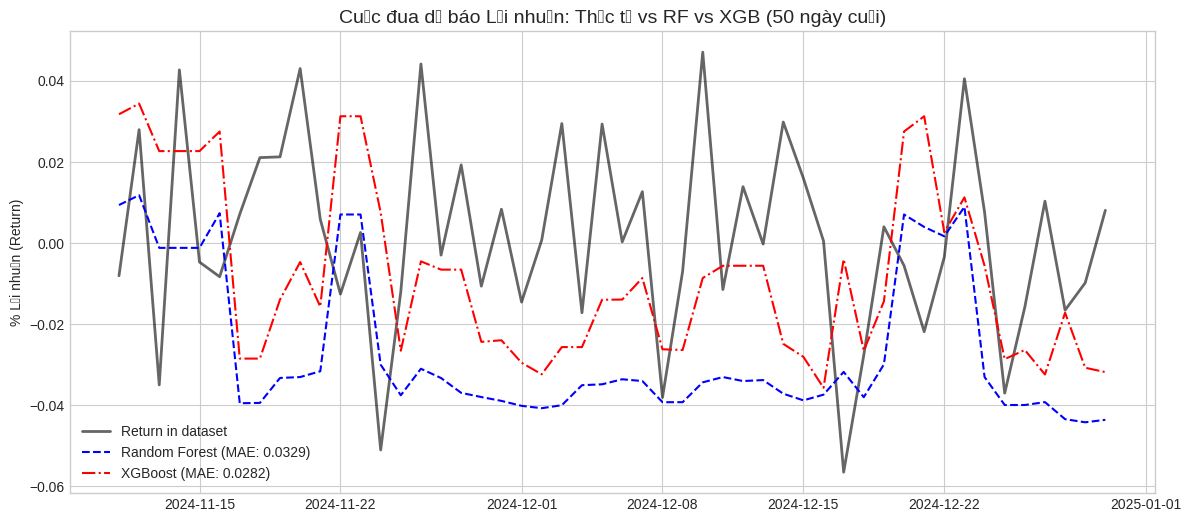

In [ ]:
# Cài đặt kích thước ảnh chung
plt.style.use('seaborn-v0_8-whitegrid') # Style đẹp hơn mặc định

# --- BIỂU ĐỒ 1: SO SÁNH ĐƯỜNG DỰ BÁO (Zoom 50 ngày cuối) ---
plt.figure(figsize=(14, 6))
days_to_plot = 50
plt.plot(y_test.index[-days_to_plot:], y_test.values[-days_to_plot:],
         label='Return in dataset', color='black', linewidth=2, alpha=0.6)
plt.plot(y_test.index[-days_to_plot:], pred_rf[-days_to_plot:],
         label=f'Random Forest (MAE: {mae_rf:.4f})', color='blue', linestyle='--')
plt.plot(y_test.index[-days_to_plot:], pred_xgb[-days_to_plot:],
         label=f'XGBoost (MAE: {mae_xgb:.4f})', color='red', linestyle='-.')

plt.title('Cuộc đua dự báo Lợi nhuận: Thực tế vs RF vs XGB (50 ngày cuối)', fontsize=14)
plt.ylabel('% Lợi nhuận (Return)')
plt.legend()
plt.show()

/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1395935038.py:28: UserWarning: Glyph 7903 (\N{LATIN SMALL LETTER O WITH HORN AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tm

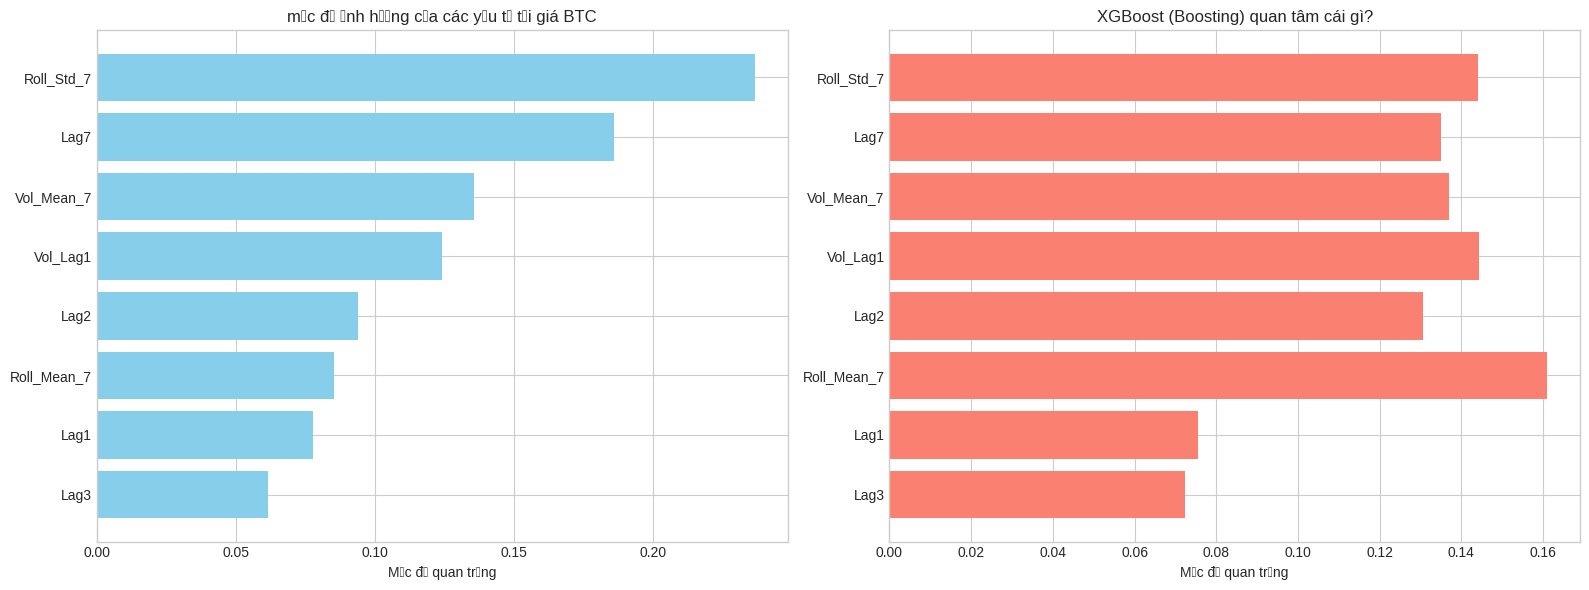

In [ ]:
# --- BIỂU ĐỒ 2: SO SÁNH FEATURE IMPORTANCE (Tư duy mô hình) ---
# Lấy tên các cột feature
feature_names = X_train.columns

# Lấy giá trị importance
imp_rf = rf_model.feature_importances_
imp_xgb = xgb_model.feature_importances_

# Sắp xếp theo RF để dễ nhìn
indices = np.argsort(imp_rf)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Random Forest
axes[0].barh(range(len(indices)), imp_rf[indices], color='skyblue', align='center')
axes[0].set_yticks(range(len(indices)))
axes[0].set_yticklabels(feature_names[indices])
axes[0].set_title('mức độ ảnh hưởng của các yếu tố tới giá BTC')
axes[0].set_xlabel('Mức độ quan trọng')

# Subplot 2: XGBoost (Sắp xếp theo thứ tự của RF để đối chiếu)
axes[1].barh(range(len(indices)), imp_xgb[indices], color='salmon', align='center')
axes[1].set_yticks(range(len(indices)))
axes[1].set_yticklabels(feature_names[indices])
axes[1].set_title('XGBoost (Boosting) quan tâm cái gì?')
axes[1].set_xlabel('Mức độ quan trọng')

plt.tight_layout()
plt.show()

Dựa trên kết quả thực nghiệm trên tập dữ liệu BTC (quy mô 365 ngày), chúng ta có những đánh giá chi tiết về hiệu suất giữa chiến lược **Bagging (Random Forest)** và **Boosting (XGBoost)** như sau:

## 1. So sánh Hiệu suất (Performance Metrics)

| Tiêu chí đánh giá | Random Forest (Bagging) | XGBoost (Boosting) | Nhận xét |
| :--- | :--- | :--- | :--- |
| **MAE (Mean Absolute Error)** | 0.033 | **0.028** | XGBoost có sai số tuyệt đối thấp hơn (~15%). |
| **RMSE (Root Mean Squared Error)** | 0.041 | **0.035** | XGBoost xử lý các điểm dữ liệu biến động mạnh (Outliers) tốt hơn đáng kể. |

> ===> Về mặt số liệu, **XGBoost áp đảo** khi giảm thiểu được sai số dự báo tốt hơn so với Random Forest.

---

## 2. Phân tích Hành vi Dự báo

Quan sát biểu đồ so sánh đường dự báo (Line Chart) trên tập kiểm thử (Test set), ta thấy sự khác biệt rõ rệt về "chiến lược học" của hai mô hình:

* **Random Forest (Đường xanh - Conservative):**
    * Thể hiện tính chất "thận trọng" và "an toàn".
    * Đường dự báo có xu hướng đi ngang quanh trục 0 (trung bình), biên độ dao động rất thấp.
    * **Hạn chế:** Thất bại trong việc nắm bắt các nhịp tăng/giảm mạnh của thị trường (Underfitting với biến động).
* **XGBoost (Đường đỏ - Aggressive):**
    * Thể hiện tính chất "nhạy bén".
    * Đường dự báo bám sát hơn hướng di chuyển (Direction) của giá thực tế.
    * **Ưu điểm:** Cố gắng mô phỏng lại biên độ dao động thay vì chỉ đưa ra mức trung bình an toàn.

---

## 3. Phân tích "Tư duy" Mô hình (Feature Importance)

Biểu đồ mức độ quan trọng của đặc trưng tiết lộ lý do tại sao XGBoost hoạt động hiệu quả hơn:

* **Tư duy của Random Forest:**
    * Ưu tiên hàng đầu: `Roll_Std_7` (Độ lệch chuẩn/Rủi ro).
    * **Ý nghĩa:** Mô hình này nhìn vào **Rủi ro** để dự đoán. Khi thấy thị trường biến động mạnh, cơ chế "bình quân hóa" của Bagging khiến nó chọn giải pháp an toàn -> Dẫn đến dự báo bị phẳng.
* **Tư duy của XGBoost:**
    * Ưu tiên hàng đầu: `Roll_Mean_7` (Xu hướng) và **`Vol_Lag1` (Volume)**.
    * **Ý nghĩa:** Mô hình này đã học được quy luật cốt lõi của Trading: **"Xu hướng + Dòng tiền (Volume) dẫn dắt giá"**. Việc đánh giá cao Volume cho thấy XGBoost đã tìm ra mối tương quan phi tuyến tính giữa khối lượng giao dịch và biến động giá.

---

# ỨNG DỤNG MÔ HÌNH HỌC SÂU

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [13]:
btc_path = '/content/drive/MyDrive/phân tích dữ liệu cuối kì/'
btc_df = pd.read_csv(btc_path + 'BTC.csv')

btc = btc_df[['close', 'volume']]

In [21]:
btc_lstm = btc[['close', 'volume']].copy()
btc_lstm = btc_lstm.dropna()
print(f"Tổng số ngày dữ liệu (2020-2025): {len(btc_lstm)}")

Tổng số ngày dữ liệu (2020-2025): 2001


**Chuẩn hóa dữ liệu**

In [22]:
# Input: Close & Volume
features = ['close', 'volume']
data_x = btc_lstm[features].values
# Output: Close (Cần dự báo giá)
data_y = btc_lstm[['close']].values

# Scaler riêng cho X và Y
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(data_x)
scaled_y = scaler_y.fit_transform(data_y)

**Cửa sổ trượt**

In [23]:
def create_sequences(X_data, y_data, time_step=60):
    X, y = [], []
    for i in range(len(X_data) - time_step - 1):
        X.append(X_data[i:(i + time_step)])
        y.append(y_data[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_x, scaled_y, time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Chia Train/Test (80% - 20%)**

In [24]:
model = Sequential()

# Layer 1: LSTM với 64 units (Tăng nhẹ số units vì dữ liệu nhiều hơn)
model.add(LSTM(units=64, return_sequences=True, input_shape=(60, 2)))
model.add(Dropout(0.2)) # Chống học vẹt

# Layer 2: LSTM tiếp theo (Deep LSTM) - Giúp học mẫu phức tạp hơn
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# batch_size=32: Tăng lên vì dữ liệu lớn hơn
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - loss: 0.0252 - val_loss: 0.0021
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


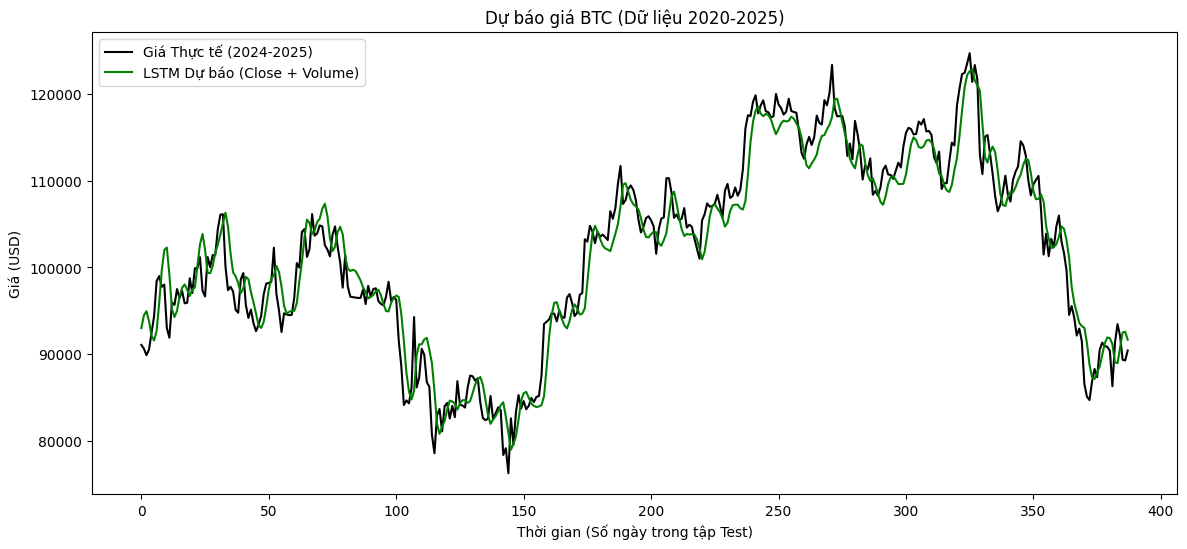

In [26]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, color='black', label='Giá Thực tế (2024-2025)')
plt.plot(y_pred, color='green', label='LSTM Dự báo (Close + Volume)')
plt.title('Dự báo giá BTC (Dữ liệu 2020-2025)')
plt.xlabel('Thời gian (Số ngày trong tập Test)')
plt.ylabel('Giá (USD)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE: Sai số chuẩn (phạt lỗi lớn)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
# MAE: Sai số tuyệt đối trung bình
mae = mean_absolute_error(y_test_actual, y_pred)
# MAPE: Sai số phần trăm trung bình (Rất dễ hiểu cho báo cáo)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100
# R2 Score: Mô hình giải thích được bao nhiêu % biến động của dữ liệu (Càng gần 1 càng tốt)
r2 = r2_score(y_test_actual, y_pred)

print("=" * 40)
print("BẢNG ĐÁNH GIÁ HIỆU QUẢ MÔ HÌNH LSTM:")
print("-" * 40)
print(f"1. RMSE (Root Mean Squared Error): {rmse:.2f} USD")
print(f"2. MAE (Mean Absolute Error):      {mae:.2f} USD")
print(f"3. MAPE (Mean Absolute % Error):   {mape:.2f} %")
print(f"4. R2 Score (Độ phù hợp):          {r2:.4f}")
print("=" * 40)

# Nhận xét nhanh cho bạn:
if mape < 5:
    print(">> Đánh giá: Mô hình RẤT TỐT (Sai số dưới 5%)")
elif mape < 10:
    print(">> Đánh giá: Mô hình KHÁ (Sai số dưới 10%)")
else:
    print(">> Đánh giá: Cần cải thiện thêm (Sai số > 10%)")



BẢNG ĐÁNH GIÁ HIỆU QUẢ MÔ HÌNH LSTM:
----------------------------------------
1. RMSE (Root Mean Squared Error): 2941.33 USD
2. MAE (Mean Absolute Error):      2290.59 USD
3. MAPE (Mean Absolute % Error):   2.29 %
4. R2 Score (Độ phù hợp):          0.9297
>> Đánh giá: Mô hình RẤT TỐT (Sai số dưới 5%)
